#  -------- This programming code is a raw version, an improved version will be uploaded soon  ---------

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Check which ISCO-codes are not in official document but are in the document of the Netherlands
def compare_df(df1,df2,compare_name):
    df_in = df1
    
    np1 = df1[compare_name].unique()

    np2 = df2[compare_name].unique()

    df_output = df_in.iloc[0:0]
    
    xyz = False
    number_missing = 0

    for i in np1:
        xyz = False
        for j in np2:
            if i == j:
                xyz = True
            
        if xyz == False:
            x = df_in[df_in[compare_name] == i]
            df_output = pd.concat([df_output,x])

    df_output = df_output.reset_index()
    df_output = df_output.drop(['index'],axis=1)
    return df_output

In [3]:
df_avg = pd.read_csv('avg_data.csv')
df_min = pd.read_csv('min_data.csv')
df_max = pd.read_csv('max_data.csv')

In [4]:
df_avg = df_avg.drop('Unnamed: 0', axis = 1)
df_min = df_min.drop('Unnamed: 0', axis = 1)
df_max = df_max.drop('Unnamed: 0', axis = 1)

In [5]:
df_avg = df_avg.rename(columns={"brc_beroep":'brc_code'})
df_min = df_min.rename(columns={"brc_beroep":'brc_code'})
df_max = df_max.rename(columns={"brc_beroep":'brc_code'})

In [6]:
df_avg = df_avg.drop('jobs_lost_low', axis = 1)
df_avg = df_avg.drop('jobs_lost_high', axis = 1)
df_avg = df_avg.rename(columns={"jobs_lost_avg":'jobs_lost_ET'})


In [7]:
df_min = df_min.drop('jobs_lost_avg', axis = 1)
df_min = df_min.drop('jobs_lost_high', axis = 1)
df_min = df_min.rename(columns={"jobs_lost_low":'jobs_lost_ET'})


In [8]:
df_max = df_max.drop('jobs_lost_low', axis = 1)
df_max = df_max.drop('jobs_lost_avg', axis = 1)
df_max = df_max.rename(columns={"jobs_lost_high":'jobs_lost_ET'})


In [9]:
df = df_avg

In [10]:
df.head()


,isco_code,isco_name,brc_code,num_working,brc_sector,Probability,jobs_lost_ET
0,1112,Ambtenaren in beleidvoerende functies,611,16,6,0.059333,0.00
1,1114,Beleidvoerende medewerkers van belangenorgani...,611,5,6,0.141667,0.00
2,1120,Directeuren van grote ondernemingen,511,75,5,0.087500,0.00
3,1212,Leidinggevende functies op het gebied van per...,521,18,5,0.323933,4.50
4,1219,Leidinggevende functies op het gebied van zak...,521,23,5,0.355000,5.75


In [11]:
df[df['brc_code'] == 711]

,isco_code,isco_name,brc_code,num_working,brc_sector,Probability,jobs_lost_ET
12,2111,Natuurkundigen en astronomen,711,3,7,0.070500,0.0
13,2113,Chemici,711,4,7,0.060500,0.0
14,2114,Geologen en geofysici,711,2,7,0.322000,0.5
15,2120,"Wiskundigen, actuarissen en statistici",711,8,7,0.148400,0.0
16,2131,"Biologen, botanici, zoölogen e.d.",711,8,7,0.079722,0.0
17,2132,"Adviseurs op het gebied van landbouw, bosbouw...",711,5,7,0.012200,0.0
18,2133,Milieudeskundigen,711,8,7,0.024500,0.0
255,2112,Meteorologen,711,0,7,0.670000,0.0


In [12]:
ham = df[df['jobs_lost_ET'] == 0]
ham.num_working.sum()

3084

In [13]:
len(df)

401

In [14]:
len(df['brc_code'].unique())

112

In [15]:
df_occ = pd.read_excel('Keys_Occupation_data.xlsx')
df_occ['brc_code'] = df_occ['Title']
df_occ['brc_name'] = df_occ['Title']

#x = df_occ.iloc[0]['Title']
#x.split(' ', maxsplit = 1)

for i in range(0, len(df_occ)):
    x = df_occ.iloc[i]['Title']
    y = df_occ.iloc[i]['brc_code']

    a,b = x.split(" ", maxsplit = 1)
    
    df_occ['brc_code'].replace(y, value=a, inplace=True)


    
for i in range(0, len(df_occ)):
    x = df_occ.iloc[i]['brc_name']
    
    a,b = x.split(" ", maxsplit = 1)
    
    df_occ['brc_name'].replace(x, value =b, inplace=True)

df_occ = df_occ[['occ_code','brc_code', 'brc_name']]    

df_occ["brc_code"] = pd.to_numeric(df_occ["brc_code"])
df_occ.head()

,occ_code,brc_code,brc_name
0,A000163,111,Docenten hoger onderwijs en hoog...
1,A000164,112,Docenten beroepsgerichte vakken ...
2,A000165,113,Docenten algemene vakken secunda...
3,A000166,114,Leerkrachten basisonderwijs
4,A000167,115,Onderwijskundigen en overige doc...


In [123]:
compare_df(df_occ,df,'brc_code')

,occ_code,brc_code,brc_name
0,A000238,634,Militaire beroepen
1,A000328,1311,Beroepsgroep overig


In [124]:
df_ed = pd.read_excel('Keys_Education_data.xlsx')
df_ed

,ed_code,education_level,education_description
0,2018700,1,Low
1,2018740,2,Middle
2,2018790,3,High
3,2018820,0,Unknown


In [125]:
df_pol = pd.read_csv('Policies_data.csv', sep = ';')
df_pol.head()
len(df_pol['occ_code'].unique())

174

In [126]:
df_pol.head()

,ID,ed_code,occ_code,periods,num_working
0,209284,2018700,A000161,2003JJ00,30
1,223204,2018740,A000161,2003JJ00,118
2,237124,2018790,A000161,2003JJ00,337
3,251044,2018820,A000161,2003JJ00,3
4,209289,2018700,A000161,2004JJ00,28


In [127]:
df_pol[df_pol['occ_code'] == "A000163"].head()

,ID,ed_code,occ_code,periods,num_working
128,209444,2018700,A000163,2003JJ00,0
129,223364,2018740,A000163,2003JJ00,2
130,237284,2018790,A000163,2003JJ00,27
131,251204,2018820,A000163,2003JJ00,0
132,209449,2018700,A000163,2004JJ00,0


In [128]:
df_pol[df_pol['occ_code'] == "A000238"].tail()

,ID,ed_code,occ_code,periods,num_working
4987,257274,2018820,A000238,2017JJ00,0
4988,215519,2018700,A000238,2018JJ00,3
4989,229439,2018740,A000238,2018JJ00,14
4990,243359,2018790,A000238,2018JJ00,9
4991,257279,2018820,A000238,2018JJ00,0


In [129]:
df_pol[df_pol['occ_code'] == "A000328"].tail()

,ID,ed_code,occ_code,periods,num_working
10747,264474,2018820,A000328,2017JJ00,5
10748,222719,2018700,A000328,2018JJ00,28
10749,236639,2018740,A000328,2018JJ00,53
10750,250559,2018790,A000328,2018JJ00,57
10751,264479,2018820,A000328,2018JJ00,6


In [130]:
df_occ[df_occ['brc_code'] == 111]

,occ_code,brc_code,brc_name
0,A000163,111,Docenten hoger onderwijs en hoog...


In [131]:
#df_pol[df_pol['occ_code'] == "A000230"]

In [132]:
expl1 = df_occ[['occ_code','brc_code']]

df1 = pd.merge(df_pol,expl1, on=['occ_code'],how ='inner')


In [133]:
df1.head()

,ID,ed_code,occ_code,periods,num_working,brc_code
0,209444,2018700,A000163,2003JJ00,0,111
1,223364,2018740,A000163,2003JJ00,2,111
2,237284,2018790,A000163,2003JJ00,27,111
3,251204,2018820,A000163,2003JJ00,0,111
4,209449,2018700,A000163,2004JJ00,0,111


In [134]:
df1[df1['brc_code'] == 1041].head()

,ID,ed_code,occ_code,periods,num_working,brc_code
6144,220564,2018700,A000302,2003JJ00,11,1041
6145,234484,2018740,A000302,2003JJ00,57,1041
6146,248404,2018790,A000302,2003JJ00,29,1041
6147,262324,2018820,A000302,2003JJ00,1,1041
6148,220569,2018700,A000302,2004JJ00,9,1041


In [135]:
print(df1['num_working'].sum())
len(df1['occ_code'].unique())

131496


114

In [136]:
#Transition to one BRC code of formed database

In [137]:
df_ET = df_occ[['brc_code', 'brc_name']]
df_ET['num_working'] = 0
df_ET['jobs_lost_ET'] = 0
df_ET.head()

,brc_code,brc_name,num_working,jobs_lost_ET
0,111,Docenten hoger onderwijs en hoog...,0,0
1,112,Docenten beroepsgerichte vakken ...,0,0
2,113,Docenten algemene vakken secunda...,0,0
3,114,Leerkrachten basisonderwijs,0,0
4,115,Onderwijskundigen en overige doc...,0,0


In [138]:
for i in range(0,len(df_ET)):
    #i = i - 1
    brc_code = df_occ.iloc[i]['brc_code']
    
    new_df = df[df['brc_code'] == brc_code]
    a = new_df['num_working'].sum()
    b = new_df['jobs_lost_ET'].sum()
    
    #x = df_ET.iloc[i]['num_working']
    #y = df_ET.iloc[i]['jobs_lost_ET']
    
    #df_ET['num_working'].replace(x, value=a, inplace=True)
    #df_ET['jobs_lost_ET'].replace(y, value=b, inplace=True)
    
    df_ET.loc[i,'num_working'] = a
    df_ET.loc[i,'jobs_lost_ET'] = b
    
    #i = i + 1

In [139]:
df_2 = df_ET
#df_2 = df_2[0:114]
df_2["brc_code"] = pd.to_numeric(df_2["brc_code"], downcast='integer')


In [140]:
pd.options.display.max_colwidth = 100


In [141]:
df_2

,brc_code,brc_name,num_working,jobs_lost_ET
0,111,Docenten hoger onderwijs en hoog...,55,0.00
1,112,Docenten beroepsgerichte vakken ...,33,0.00
2,113,Docenten algemene vakken secunda...,108,0.00
3,114,Leerkrachten basisonderwijs,144,0.00
4,115,Onderwijskundigen en overige doc...,69,0.00
5,121,Beroepsgroep sportinstructeurs,43,6.25
6,131,Leidsters kinderopvang en onderw...,135,8.75
7,211,Bibliothecarissen en conservatoren,7,1.75
8,212,Auteurs en taalkundigen,32,4.75
9,213,Journalisten,30,0.00


In [142]:
poi = df_2[df_2['brc_code'] == 111]
poi

,brc_code,brc_name,num_working,jobs_lost_ET
0,111,Docenten hoger onderwijs en hoog...,55,0.0


In [155]:
kaas = df_2[df_2['jobs_lost_ET']== 0]
kaas.head()

,brc_code,brc_name,num_working,jobs_lost_ET
0,111,Docenten hoger onderwijs en hoog...,55,0.0
1,112,Docenten beroepsgerichte vakken ...,33,0.0
2,113,Docenten algemene vakken secunda...,108,0.0
3,114,Leerkrachten basisonderwijs,144,0.0
4,115,Onderwijskundigen en overige doc...,69,0.0


In [156]:
kaas.num_working.sum()

2056

In [157]:
expl7 = df_2[df_2['jobs_lost_ET']== 0]
expl7 = expl7[['brc_code']]
expl7 = expl7.reset_index(drop=True)
expl7

,brc_code
0,111
1,112
2,113
3,114
4,115
5,213
6,214
7,221
8,331
9,413


In [143]:
# In the origianl df_pol the overall categories are still incorporated therefor we lose this data. But we see
# that there are still 114 occupations in there 

In [144]:
expl2 = df_ed[['ed_code','education_level']]

df2 = pd.merge(df1,expl2,on=['ed_code'],how ='inner')


In [145]:
df2.head()

,ID,ed_code,occ_code,periods,num_working,brc_code,education_level
0,209444,2018700,A000163,2003JJ00,0,111,1
1,209449,2018700,A000163,2004JJ00,0,111,1
2,209454,2018700,A000163,2005JJ00,0,111,1
3,209459,2018700,A000163,2006JJ00,0,111,1
4,209464,2018700,A000163,2007JJ00,0,111,1


In [146]:
df3 = df2[['ID','brc_code','periods','education_level','num_working']]
df3.head()

,ID,brc_code,periods,education_level,num_working
0,209444,111,2003JJ00,1,0
1,209449,111,2004JJ00,1,0
2,209454,111,2005JJ00,1,0
3,209459,111,2006JJ00,1,0
4,209464,111,2007JJ00,1,0


In [147]:
# Percentage growht per brc_code

In [148]:
expl2003 = df3[df3['periods'] == ('2003JJ00')]

expl2018 = df3[df3['periods'] == ('2018JJ00')]

In [149]:
expl8 = expl7.copy()
expl8['jc_03'] = 0
expl8['jc_18'] = 0
expl8['job_decrease'] = 0
expl8['job_growth'] = 0

In [150]:
#expl8 = expl8.reset_index(drop=True)

In [151]:
expl8

,brc_code,jc_03,jc_18,job_decrease,job_growth
0,111,0,0,0,0
1,112,0,0,0,0
2,113,0,0,0,0
3,114,0,0,0,0
4,115,0,0,0,0
5,121,0,0,0,0
6,131,0,0,0,0
7,211,0,0,0,0
8,212,0,0,0,0
9,213,0,0,0,0


In [152]:
for i in range(0,len(expl8)):
    brc_code = expl8.iloc[i]['brc_code']
    
    df1 = expl2003[expl2003['brc_code'] == brc_code]
    df2 = expl2018[expl2018['brc_code'] == brc_code]
    
    x = df1['num_working'].sum()
    y = df2['num_working'].sum()
    
    expl8.loc[i,'jc_03'] = x
    expl8.loc[i,'jc_18'] = y
    
    z = ((y-x)/15)
    
    v = z/x
    
    if (z>0): 
        expl8.loc[i,'job_growth'] = (x*v) * 12 # growth per year times 12 for the duration until 2030
    else:
        expl8.loc[i,'job_decrease'] = (-x*v) * 12



c:\users\paul schot\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
c:\users\paul schot\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


In [154]:
expl8.sum()

,brc_code,jc_03,jc_18,job_decrease,job_growth
0,111,29,56,0.0,21.6
1,112,61,32,23.2,0.0
2,113,82,109,0.0,21.6
3,114,162,161,0.8,0.0
4,115,34,70,0.0,28.8
5,121,22,46,0.0,19.2
6,131,98,143,0.0,36.0
7,211,8,8,-0.0,0.0
8,212,24,32,0.0,6.4
9,213,22,31,0.0,7.2


In [50]:
expl9 = expl8[['brc_code','job_decrease','job_growth']]

In [51]:
df12 = pd.merge(df_2,expl9,on=['brc_code'],how ='left')

In [52]:
df12 = df12.fillna(value = 0)

In [53]:
df12

,brc_code,brc_name,num_working,jobs_lost_ET,job_decrease,job_growth
0,111,Docenten hoger onderwijs en hoog...,55,0.00,0.0,21.6
1,112,Docenten beroepsgerichte vakken ...,33,0.00,23.2,0.0
2,113,Docenten algemene vakken secunda...,108,0.00,0.0,21.6
3,114,Leerkrachten basisonderwijs,144,0.00,0.8,0.0
4,115,Onderwijskundigen en overige doc...,69,0.00,0.0,28.8
5,121,Beroepsgroep sportinstructeurs,43,6.25,0.0,0.0
6,131,Leidsters kinderopvang en onderw...,135,8.75,0.0,0.0
7,211,Bibliothecarissen en conservatoren,7,1.75,0.0,0.0
8,212,Auteurs en taalkundigen,32,4.75,0.0,0.0
9,213,Journalisten,30,0.00,0.0,7.2


In [54]:
df12['jobs_lost'] = df12['jobs_lost_ET'] + df12['job_decrease']

In [55]:
# Incorporate sectors
df_beroep = pd.read_excel("brc_sector.xlsx")
df_beroep = df_beroep.drop_duplicates()
df_beroep = df_beroep.reset_index()
df_beroep = df_beroep.drop(labels="index", axis = 1)
df_beroep = df_beroep.rename(columns={"brc_beroep":'brc_code'})
df_beroep.head()

,brc_code,brc_sector
0,634,6
1,551,5
2,611,6
3,1311,13
4,511,5


In [56]:
df13 = pd.merge(df12,df_beroep, on=['brc_code'], how='inner')

In [57]:
df13 = df13[['brc_code','brc_sector','brc_name','num_working','job_growth','jobs_lost']]
df13.head()

,brc_code,brc_sector,brc_name,num_working,job_growth,jobs_lost
0,111,1,Docenten hoger onderwijs en hoog...,55,21.6,0.0
1,112,1,Docenten beroepsgerichte vakken ...,33,0.0,23.2
2,113,1,Docenten algemene vakken secunda...,108,21.6,0.0
3,114,1,Leerkrachten basisonderwijs,144,0.0,0.8
4,115,1,Onderwijskundigen en overige doc...,69,28.8,0.0


In [58]:
df13.sum()

brc_code                                                                                                     77592
brc_sector                                                                                                     746
brc_name       Docenten hoger onderwijs en hoog...Docenten beroepsgerichte vakken ...Docenten algemene vakken s...
num_working                                                                                                   8232
job_growth                                                                                                   484.8
jobs_lost                                                                                                  3067.55
dtype: object

In [59]:
## Education level

In [60]:
expl22 = df3[df3['education_level']==0]
expl22.head()

,ID,brc_code,periods,education_level,num_working
5472,251204,111,2003JJ00,0,0
5473,251209,111,2004JJ00,0,0
5474,251214,111,2005JJ00,0,0
5475,251219,111,2006JJ00,0,0
5476,251224,111,2007JJ00,0,0


In [61]:
expl22 = df3[df3['education_level']==0]

expl22['num_working'].sum()

1219

In [62]:
expl22 = df3[df3['education_level']==1]

expl22['num_working'].sum()

31639

In [63]:
expl22 = df3[df3['education_level']==2]

expl22['num_working'].sum()

56039

In [64]:
expl22 = df3[df3['education_level']==3]

expl22['num_working'].sum()

42599

In [65]:
# Check if there are brc code missing

compare_df(df, df3,'brc_code')

,isco_code,isco_name,brc_code,num_working,brc_sector,Probability,jobs_lost_ET


In [66]:
# reset all the education levels that are 0 to 1 since we assume education levels of 1 are reseached at least

In [67]:
df4 = df3
for i in range(0, len(df4)):
    x = df4.iloc[i]['education_level']
    
    if (x == 0):
        df4["education_level"].replace(x, value=1, inplace=True)

In [68]:
df4[df4['education_level']==0]

,ID,brc_code,periods,education_level,num_working


In [69]:
df4[df4['education_level']==2].head()

,ID,brc_code,periods,education_level,num_working
1824,223364,111,2003JJ00,2,2
1825,223369,111,2004JJ00,2,0
1826,223374,111,2005JJ00,2,1
1827,223379,111,2006JJ00,2,1
1828,223384,111,2007JJ00,2,2


In [70]:
# Check per occupation what the education level is

In [71]:
expl3 = df4[df4['brc_code'] == 111]

X1 = expl3[expl3['education_level']==1]
X2 = expl3[expl3['education_level']==2]
X3 = expl3[expl3['education_level']==3]
print (X3)
Y1 = X1['num_working'].sum()
Y2 = X2['num_working'].sum()
Y3 = X3['num_working'].sum()
print(Y1,Y2,Y3)

if (Y2 > Y3 ) & ( Y2 > Y1):
    print ('hi')
else:
    print('no')

          ID  brc_code   periods  education_level  num_working
3648  237284       111  2003JJ00                3           27
3649  237289       111  2004JJ00                3           23
3650  237294       111  2005JJ00                3           24
3651  237299       111  2006JJ00                3           24
3652  237304       111  2007JJ00                3           24
3653  237309       111  2008JJ00                3           25
3654  237314       111  2009JJ00                3           29
3655  237319       111  2010JJ00                3           31
3656  237324       111  2011JJ00                3           28
3657  237329       111  2012JJ00                3           32
3658  237334       111  2013JJ00                3           40
3659  237339       111  2014JJ00                3           44
3660  237344       111  2015JJ00                3           44
3661  237349       111  2016JJ00                3           43
3662  237354       111  2017JJ00                3      

In [72]:
# df  with      brc_code and education level

In [73]:
expl4 = df_occ['brc_code']
expl4 = pd.DataFrame(expl4)
expl5 = expl4[0:0]

#expl5['education_level_1'] = 1
#expl5['education_level_2'] = 1
#expl5['education_level_3'] = 1
expl5['percentage_ed_1'] = 1
expl5['percentage_ed_2'] = 1
expl5['percentage_ed_3'] = 1

In [74]:

for i in range(0, len(expl4)):
    x = expl4.iloc[i]['brc_code']
    
    df = df4[df4['brc_code'] == x]
    
    X1 = df[df['education_level']==1]
    X2 = df[df['education_level']==2]
    X3 = df[df['education_level']==3]
    
    Y1 = X1['num_working'].sum()
    Y2 = X2['num_working'].sum()
    Y3 = X3['num_working'].sum()
    
    
    print(Y1,Y2,Y3) 


1 46 536
37 165 663
21 135 1278
50 240 2446
28 137 553
110 310 121
387 1278 364
1 29 106
14 91 391
6 80 263
16 49 192
57 172 353
54 296 405
42 150 142
98 522 1323
236 776 624
378 891 256
2421 2986 611
845 561 55
429 639 206
31 168 827
19 145 730
42 248 1235
14 127 842
45 272 909
199 1315 818
153 639 1020
153 918 528
1625 3186 1030
183 758 209
572 1240 416
293 881 359
641 1269 532
86 283 655
83 245 617
57 222 510
144 422 460
60 167 139
12 82 227
18 129 364
5 31 345
43 192 379
143 283 96
266 649 314
40 94 60
13 48 125
26 139 417
118 462 504
11 94 918
8 123 59
63 463 94
281 492 101
115 270 111
9 60 460
56 298 1134
5 47 161
8 59 363
214 1115 601
273 629 229
166 385 54
656 509 58
677 758 57
420 420 24
223 272 14
332 339 25
405 465 27
298 294 11
307 551 26
358 763 67
128 159 10
93 153 13
113 180 38
353 381 48
167 324 58
387 909 86
636 522 61
196 158 22
725 336 40
107 625 1972
121 691 532
59 264 74
36 105 65
212 306 64
764 729 83
366 579 107
176 106 13
15 61 1310
23 304 1165
27 110 903
24 159

In [75]:

for i in range(0, len(expl4)):
    x = expl4.iloc[i]['brc_code']
    
    df = df4[df4['brc_code'] == x]
    
    X1 = df[df['education_level']==1]
    X2 = df[df['education_level']==2]
    X3 = df[df['education_level']==3]
    
    Y1 = X1['num_working'].sum()
    Y2 = X2['num_working'].sum()
    Y3 = X3['num_working'].sum()
    
    YY = Y1 + Y2 + Y3
    
    Z1 = Y1/YY
    Z2 = Y2/YY
    Z3 = Y3/YY
    
    expl5 = expl5.append({'brc_code':x,'percentage_ed_1': Z1, 'percentage_ed_2': Z2, 'percentage_ed_3': Z3}, ignore_index=True)
    
    expl5["brc_code"] = pd.to_numeric(expl5["brc_code"], downcast='integer')
    #expl5 = expl5.to_numeric('brc_code',downcast='integer') 
    #pd.to_numeric(s, downcast='integer')
    #df.append({'Rank': new[0],'Probability': new[1],'soc_code': new[2],'Occupation': new[3]}, ignore_index=True)
    
    #if (Y3 > Y2 ) & ( Y3 > Y1):
        #expl4[''] df4["education_level"].replace(x, value=1, inplace=True)

In [76]:
expl5.head()

,brc_code,percentage_ed_1,percentage_ed_2,percentage_ed_3
0,111,0.001715,0.078902,0.919383
1,112,0.042775,0.190751,0.766474
2,113,0.014644,0.094142,0.891213
3,114,0.018275,0.087719,0.894006
4,115,0.038997,0.190808,0.770195


In [77]:
expl5.sum()/114

brc_code           680.631579
percentage_ed_1      0.219428
percentage_ed_2      0.412718
percentage_ed_3      0.367854
dtype: float64

In [78]:
df4 = pd.merge(df13,expl5,on=['brc_code'], how = 'inner')

In [79]:
df4

,brc_code,brc_sector,brc_name,num_working,job_growth,jobs_lost,percentage_ed_1,percentage_ed_2,percentage_ed_3
0,111,1,Docenten hoger onderwijs en hoog...,55,21.6,0.00,0.001715,0.078902,0.919383
1,112,1,Docenten beroepsgerichte vakken ...,33,0.0,23.20,0.042775,0.190751,0.766474
2,113,1,Docenten algemene vakken secunda...,108,21.6,0.00,0.014644,0.094142,0.891213
3,114,1,Leerkrachten basisonderwijs,144,0.0,0.80,0.018275,0.087719,0.894006
4,115,1,Onderwijskundigen en overige doc...,69,28.8,0.00,0.038997,0.190808,0.770195
5,121,1,Beroepsgroep sportinstructeurs,43,0.0,6.25,0.203327,0.573013,0.223660
6,131,1,Leidsters kinderopvang en onderw...,135,0.0,8.75,0.190734,0.629867,0.179399
7,211,2,Bibliothecarissen en conservatoren,7,0.0,1.75,0.007353,0.213235,0.779412
8,212,2,Auteurs en taalkundigen,32,0.0,4.75,0.028226,0.183468,0.788306
9,213,2,Journalisten,30,7.2,0.00,0.017192,0.229226,0.753582


In [80]:
df4['job_growth1'] = df4['job_growth'] * df4['percentage_ed_1']
df4['job_growth2'] = df4['job_growth'] * df4['percentage_ed_2']
df4['job_growth3'] = df4['job_growth'] * df4['percentage_ed_3']
df4['jobs_lost1'] = df4['jobs_lost'] * df4['percentage_ed_1']
df4['jobs_lost2'] = df4['jobs_lost'] * df4['percentage_ed_2']
df4['jobs_lost3'] = df4['jobs_lost'] * df4['percentage_ed_3']

In [81]:
df5 = df4[['brc_code','brc_sector','brc_name','num_working','job_growth1','job_growth2','job_growth3','jobs_lost1','jobs_lost2','jobs_lost3']]

In [82]:
df5.tail()

,brc_code,brc_sector,brc_name,num_working,job_growth1,job_growth2,job_growth3,jobs_lost1,jobs_lost2,jobs_lost3
109,1214,12,Vrachtwagenchauffeurs,87,0.000000,0.000000,0.000000,12.541971,8.629692,0.578337
110,1215,12,Bedieners mobiele machines,75,0.000000,0.000000,0.000000,18.018653,14.565803,1.015544
111,1221,12,"Laders, lossers en vakkenvullers",244,0.000000,0.000000,0.000000,38.437637,20.658897,2.453466
112,1222,12,Vuilnisophalers en dagbladenbezo.,77,0.000000,0.000000,0.000000,41.350520,15.578158,2.471322
113,1311,13,Beroepsgroep overig,0,9.249778,12.517778,12.632444,0.000000,0.000000,0.000000


In [83]:
df_class = pd.read_excel("class_label.xlsx")
df_class

,brc_sector,brc_class_label
0,1,Pedagogische beroepen
1,2,Creatieve en taalkundige beroepen
2,3,Commerciële beroepen
3,4,Bedrijfseconomische en administratieve beroepen
4,5,Managers
5,6,"Openbaar bestuur, veiligheid en juridische beroepen"
6,7,Technische beroepen
7,8,ICT beroepen
8,9,Agrarische beroepen
9,10,Zorg en welzijn beroepen


In [84]:
df6 = df_class
df6['num_working'] = 0
df6['job_growth1'] = 0
df6['job_growth2'] = 0
df6['job_growth3'] = 0
df6['jobs_lost1'] = 0
df6['jobs_lost2'] = 0 
df6['jobs_lost3'] = 0
df6

,brc_sector,brc_class_label,num_working,job_growth1,job_growth2,job_growth3,jobs_lost1,jobs_lost2,jobs_lost3
0,1,Pedagogische beroepen,0,0,0,0,0,0,0
1,2,Creatieve en taalkundige beroepen,0,0,0,0,0,0,0
2,3,Commerciële beroepen,0,0,0,0,0,0,0
3,4,Bedrijfseconomische en administratieve beroepen,0,0,0,0,0,0,0
4,5,Managers,0,0,0,0,0,0,0
5,6,"Openbaar bestuur, veiligheid en juridische beroepen",0,0,0,0,0,0,0
6,7,Technische beroepen,0,0,0,0,0,0,0
7,8,ICT beroepen,0,0,0,0,0,0,0
8,9,Agrarische beroepen,0,0,0,0,0,0,0
9,10,Zorg en welzijn beroepen,0,0,0,0,0,0,0


In [85]:
for i in range(0,len(df_class)):
    brc_sector = df_class.iloc[i]['brc_sector']
    
    df1 = df5[df5['brc_sector'] == brc_sector]
    
    x1 = df1['num_working'].sum()
    x2 = df1['job_growth1'].sum()
    x3 = df1['job_growth2'].sum()
    x4 = df1['job_growth3'].sum()
    x5 = df1['jobs_lost1'].sum()
    x6 = df1['jobs_lost2'].sum()
    x7 = df1['jobs_lost3'].sum()
    
    df6.loc[i,'num_working'] = x1
    df6.loc[i,'job_growth1'] = x2
    df6.loc[i,'job_growth2'] = x3
    df6.loc[i,'job_growth3'] = x4
    df6.loc[i,'jobs_lost1'] = x5
    df6.loc[i,'jobs_lost2'] = x6
    df6.loc[i,'jobs_lost3'] = x7
    

In [86]:
df6.sum()

brc_sector                                                                                                          91
brc_class_label    Pedagogische beroepenCreatieve en taalkundige beroepenCommerciële beroepenBedrijfseconomische en...
num_working                                                                                                       8232
job_growth1                                                                                                    26.0936
job_growth2                                                                                                    97.5839
job_growth3                                                                                                    361.122
jobs_lost1                                                                                                     1003.23
jobs_lost2                                                                                                      1477.2
jobs_lost3                                      

In [87]:
df7 = df6

In [88]:
df7

,brc_sector,brc_class_label,num_working,job_growth1,job_growth2,job_growth3,jobs_lost1,jobs_lost2,jobs_lost3
0,1,Pedagogische beroepen,587,1.476488,9.233026,61.290487,3.946710,13.588275,21.465014
1,2,Creatieve en taalkundige beroepen,211,2.011994,12.000628,19.587377,0.668623,2.899680,9.431697
2,3,Commerciële beroepen,974,3.569311,8.413377,2.417311,188.026571,231.702007,73.871422
3,4,Bedrijfseconomische en administratieve beroepen,1565,2.944720,18.273537,82.781742,166.166600,426.438943,254.594457
4,5,Managers,432,0.971198,3.040754,6.388048,22.464596,62.461385,71.174019
5,6,"Openbaar bestuur, veiligheid en juridische beroepen",268,0.406452,2.987097,0.606452,18.588465,43.787434,34.024101
6,7,Technische beroepen,1184,1.712252,9.341405,35.346343,228.238550,274.465919,41.995531
7,8,ICT beroepen,296,0.000000,0.000000,0.000000,3.825236,17.479465,13.145299
8,9,Agrarische beroepen,185,0.000000,0.000000,0.000000,39.705914,46.183789,7.660297
9,10,Zorg en welzijn beroepen,1131,2.392099,18.299987,136.907914,21.947102,96.150929,20.801970


In [124]:
expl10 = df6
expl10['job_growth'] = expl10['job_growth1'] + expl10['job_growth2'] + expl10['job_growth3']
expl10['jobs_lost'] = expl10['jobs_lost1'] + expl10['jobs_lost2'] + expl10['jobs_lost3']

In [125]:
expl10 = expl10[[ 'brc_sector','jobs_lost','job_growth']]
expl10

,brc_sector,jobs_lost,job_growth
0,1,39.00,72.0
1,2,13.00,33.6
2,3,493.60,14.4
3,4,847.20,104.0
4,5,156.10,10.4
5,6,96.40,4.0
6,7,544.70,46.4
7,8,34.45,0.0
8,9,93.55,0.0
9,10,138.90,157.6


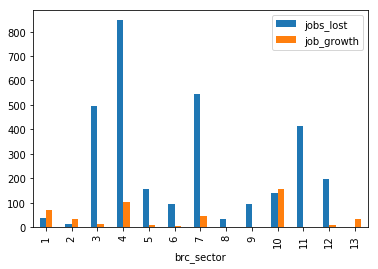

In [126]:
expl10.plot.bar(x ='brc_sector')
plt.show()

#incorporated are job growth and extra job loss through historical information

In [127]:
# Replace workers with workers from the same sector

In [128]:
df7 = df7.round(decimals = 3)
df7 = df7[['brc_sector','job_growth1','job_growth2','job_growth3','jobs_lost1','jobs_lost2','jobs_lost3']]

In [129]:
df7

,brc_sector,job_growth1,job_growth2,job_growth3,jobs_lost1,jobs_lost2,jobs_lost3
0,1,1.476,9.233,61.290,3.947,13.588,21.465
1,2,2.012,12.001,19.587,0.669,2.900,9.432
2,3,3.569,8.413,2.417,188.027,231.702,73.871
3,4,2.945,18.274,82.782,166.167,426.439,254.594
4,5,0.971,3.041,6.388,22.465,62.461,71.174
5,6,0.406,2.987,0.606,18.588,43.787,34.024
6,7,1.712,9.341,35.346,228.239,274.466,41.996
7,8,0.000,0.000,0.000,3.825,17.479,13.145
8,9,0.000,0.000,0.000,39.706,46.184,7.660
9,10,2.392,18.300,136.908,21.947,96.151,20.802


In [130]:
df7.sum()

brc_sector       91.000
job_growth1      26.092
job_growth2      97.584
job_growth3     361.120
jobs_lost1     1003.233
jobs_lost2     1477.200
jobs_lost3      587.117
dtype: float64

In [147]:

for i in range(0,len(df7)):
    
    x1 = df7.iloc[i]['jobs_lost3']
    x2 = df7.iloc[i]['job_growth3']
    
    if (x1 < x2):
        df7.loc[i,'jobs_lost3'] = 0
        df7.loc[i,'job_growth3'] = (x2 - x1)
    else:
        df7.loc[i,'jobs_lost3'] = (x1 - x2)
        df7.loc[i,'job_growth3'] = 0
        
    x3 = df7.iloc[i]['jobs_lost2']
    x4 = df7.iloc[i]['job_growth2']
    
    if (x3 < x4):
        df7.loc[i,'jobs_lost2'] = 0
        df7.loc[i,'job_growth2'] = (x4 - x3)
    else:
        df7.loc[i,'jobs_lost2'] = (x3 - x4)
        df7.loc[i,'job_growth2'] = 0
        
    x5 = df7.iloc[i]['jobs_lost1']
    x6 = df7.iloc[i]['job_growth1']
    
    if (x5 < x6):
        df7.loc[i,'jobs_lost1'] = 0
        df7.loc[i,'job_growth1'] = (x6 - x5)
    else:
        df7.loc[i,'jobs_lost1'] = (x5 - x6)
        df7.loc[i,'job_growth1'] = 0


In [94]:
df7

,brc_sector,job_growth1,job_growth2,job_growth3,jobs_lost1,jobs_lost2,jobs_lost3
0,1,0.000,0.000,32.960,2.609,5.065,0.000
1,2,0.957,6.995,6.190,0.000,0.000,0.000
2,3,0.000,0.000,0.000,182.716,219.182,70.274
3,4,0.000,0.000,0.000,163.421,409.644,179.849
4,5,0.000,0.000,0.000,24.281,64.067,57.294
5,6,0.000,0.000,0.000,17.862,36.424,30.285
6,7,0.000,0.000,0.000,228.435,270.105,11.473
7,8,0.000,0.000,0.000,4.468,21.152,15.973
8,9,0.000,0.000,0.000,39.706,46.184,7.660
9,10,0.000,0.000,111.217,20.310,84.721,0.000


In [95]:
for i in range(0,len(df7)):
    
    x1 = df7.iloc[i]['jobs_lost3']
    x2 = df7.iloc[i]['job_growth3']
    
    x3 = df7.iloc[i]['jobs_lost2']
    x4 = df7.iloc[i]['job_growth2']
    
    x5 = df7.iloc[i]['jobs_lost1']
    x6 = df7.iloc[i]['job_growth1']
    
      
    if (x3 < x2):
        df7.loc[i,'jobs_lost2'] = 0
        df7.loc[i,'job_growth3'] = (x2 - x3)
    else:
        df7.loc[i,'jobs_lost2'] = (x3 - x2)
        df7.loc[i,'job_growth3'] = 0
        

    
    if (x5 < x4):
        df7.loc[i,'jobs_lost1'] = 0
        df7.loc[i,'job_growth2'] = (x4 - x5)
    else:
        df7.loc[i,'jobs_lost1'] = (x5 - x4)
        df7.loc[i,'job_growth2'] = 0
        
    
 

In [96]:
df7

,brc_sector,job_growth1,job_growth2,job_growth3,jobs_lost1,jobs_lost2,jobs_lost3
0,1,0.000,0.000,27.895,2.609,0.000,0.000
1,2,0.957,6.995,6.190,0.000,0.000,0.000
2,3,0.000,0.000,0.000,182.716,219.182,70.274
3,4,0.000,0.000,0.000,163.421,409.644,179.849
4,5,0.000,0.000,0.000,24.281,64.067,57.294
5,6,0.000,0.000,0.000,17.862,36.424,30.285
6,7,0.000,0.000,0.000,228.435,270.105,11.473
7,8,0.000,0.000,0.000,4.468,21.152,15.973
8,9,0.000,0.000,0.000,39.706,46.184,7.660
9,10,0.000,0.000,26.496,20.310,0.000,0.000


In [97]:
df7.sum()

brc_sector       91.000
job_growth1      15.707
job_growth2      26.957
job_growth3      80.726
jobs_lost1      992.005
jobs_lost2     1325.076
jobs_lost3      408.372
dtype: float64

In [98]:
df8 = df7[['brc_sector','jobs_lost1','jobs_lost2', 'jobs_lost3']]
df8


,brc_sector,jobs_lost1,jobs_lost2,jobs_lost3
0,1,2.609,0.000,0.000
1,2,0.000,0.000,0.000
2,3,182.716,219.182,70.274
3,4,163.421,409.644,179.849
4,5,24.281,64.067,57.294
5,6,17.862,36.424,30.285
6,7,228.435,270.105,11.473
7,8,4.468,21.152,15.973
8,9,39.706,46.184,7.660
9,10,20.310,0.000,0.000


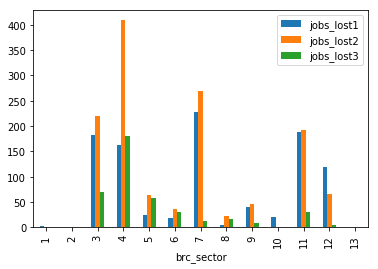

In [99]:
# What is the distribution of workers that is available
df8.plot.bar(x ='brc_sector')
plt.show()

In [100]:
z1 = int(df8['jobs_lost1'].sum()*1000)
z2 = int(df8['jobs_lost2'].sum()*1000)
z3 = int(df8['jobs_lost3'].sum()*1000)

print('Number of people lost current job educational level 1')
print(z1)
print('Number of people lost current job educational level 2')
print(z2)
print('Number of people lost current job educational level 3')
print(z3)

print('Total number of current jobs lost')
print(z1+z2+z3)

Number of people lost current job educational level 1
992005
Number of people lost current job educational level 2
1325076
Number of people lost current job educational level 3
408372
Total number of current jobs lost
2725453
